Readme 

In [22]:
#Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import missingno
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 

In [23]:
#Read file and show overview of data 
titanic_df = pd.read_csv("Titanic.csv") 
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#Columns in dataset 
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Explanation of the column names 

An explanation of the column names is available on kaggle (https://www.kaggle.com/c/titanic/data):  

- Each passenger gets a PassengerId. 
- Survived describes if they survived the distater or not (0 = No, 1 = Yes).  
- Pclass refers to the ticket class each passenger purchased/stayed in and is divided into 1st (1), 2nd (2) and 3rd (3) class. This can be considered representative of the socio-economic status of the passenger. 
- The name of each passenger is recorded. 
- Sex is either male or female.  
- Age is recorded in years. 
- SibSp refers to the number of siblings or if the passenger had a spouse on board of the titanic. 
- Parch is short for parent/child i.e. the number of parents or children the passenger had on board (some children only travelled with a nanny leading to some children having a value of 0 for Parch). 
- Ticket contains the ticket number the passenger purchased. 
- Fare is how much the passenger paid. 
- Cabin is the cabin number the passenger stayed in. 
- Embarked is the initial of the harbour the passenger embarked at (C=Cherbourg, Q=Queenstown, S=Southampton).  

In [25]:
#Overview of dataset  
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#Cleaning the data: check for missing entries  
missing_entries = titanic_df.isnull().sum() 
missing_entries 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

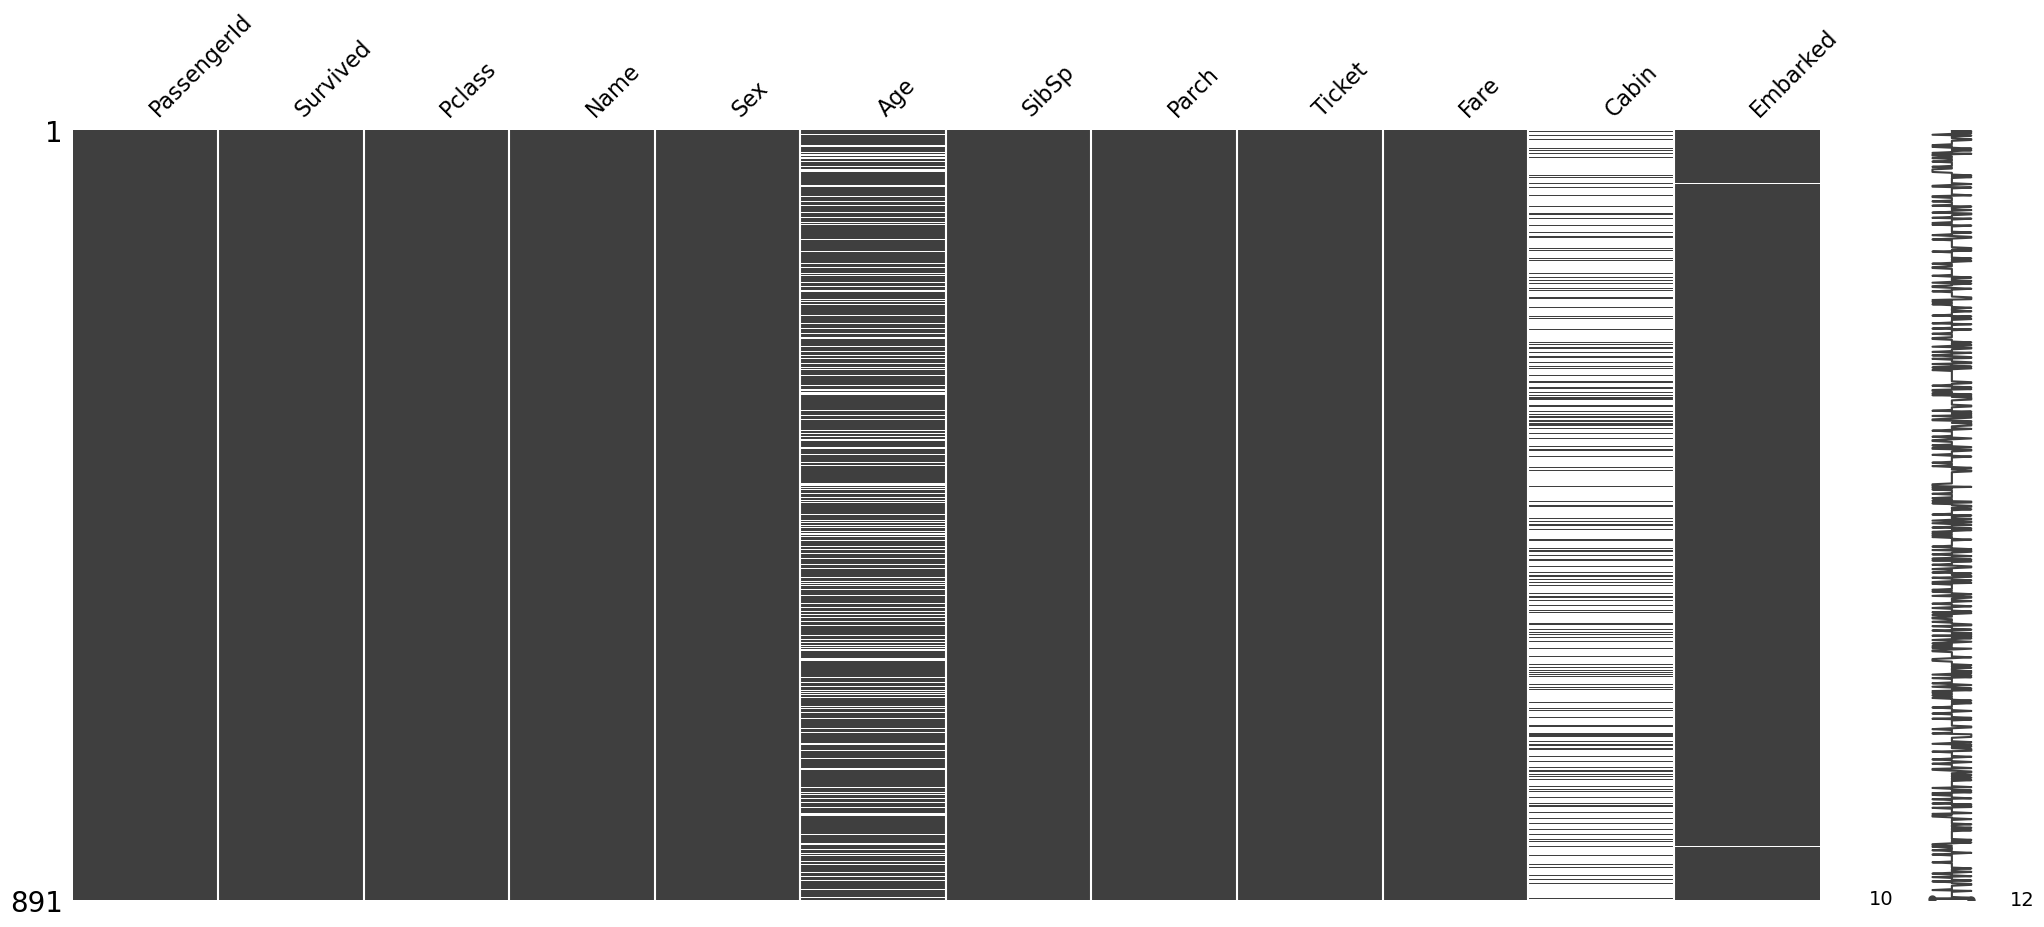

In [28]:
#Graph of missing values
missingno.matrix(titanic_df)

At 687 out of 891, a signifcant amount of entries for Cabin are missing. There are also 177 missing entries for Age, while for Embarked only 2 are missing. 

As so many entries for Cabin are missing and the layout of the Titanic in relation to each cabin is not given (as the position of the cabin might have affected how easy it was to get to the lifeboats), the column will be dropped entirely. 

Many entries for Age are missing, however being older or younger might affect your chances of survival so it is an important column to keep. Removing these entries would also affect the other columns. The missing entries will be filled with the mean of the Age column as age in a continuous variable.   

For Embarked only two entries are missing. These can be filled in using the mode of the column as it is a categorical variable.

Additionally, it is important to consider the other columns. It is unlikely that the PassengerId, Ticket or Name had a huge impact on survival in general so they too will be dropped. 

In [29]:
#Missing entries - dropping the Cabin, PassengerId, Name and Ticket column 
titanic_df.drop(['Cabin'], inplace=True, axis=1) 
titanic_df.drop(['PassengerId'], inplace=True, axis=1) 
titanic_df.drop(['Name'], inplace=True, axis=1) 
titanic_df.drop(['Ticket'], inplace=True, axis=1) 

titanic_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
#Missing entries: Age 
mean_age = titanic_df['Age'].mean() 
titanic_df.loc[titanic_df['Age'].isnull(), 'Age'] = mean_age 

In [31]:
#Missing entries: Embarked column 
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
#Missing entries: filling Embarked column 
titanic_df['Embarked'].mode() 
titanic_df.loc[titanic_df['Embarked'].isnull(), 'Embarked'] ='S'

titanic_df['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [33]:
#Encoding categorial variables in Embarked 
le = preprocessing.LabelEncoder() 
le.fit(titanic_df['Embarked'])
print(le.classes_) 

titanic_df['Embarked'] = LabelEncoder().fit_transform(titanic_df['Embarked']) 

le.fit(titanic_df['Embarked'])
print(le.classes_) 

['C' 'Q' 'S']
[0 1 2]


In [49]:
#Encoding categorial variables in Sex 
le = preprocessing.LabelEncoder() 
le.fit(titanic_df['Sex'])
print(le.classes_) 

titanic_df['Sex'] = LabelEncoder().fit_transform(titanic_df['Sex']) 

le.fit(titanic_df['Sex'])
print(le.classes_) 

['female' 'male']
[0 1]


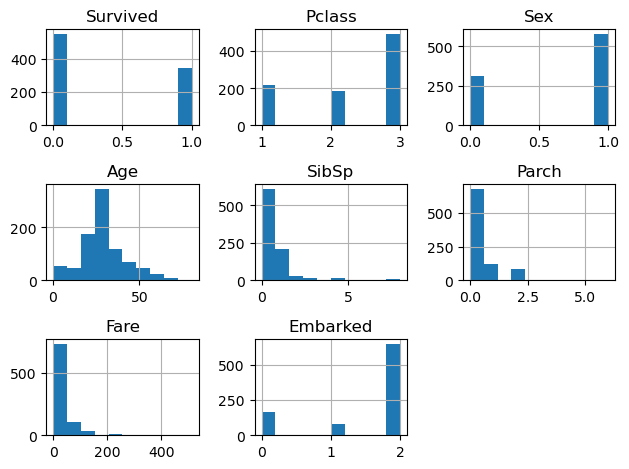

In [50]:
#Histograms of each column 
titanic_df.hist()
plt.tight_layout() 
plt.show()

### Most important factor in determining survival on Titanic? 

<Axes: xlabel='Survived', ylabel='count'>

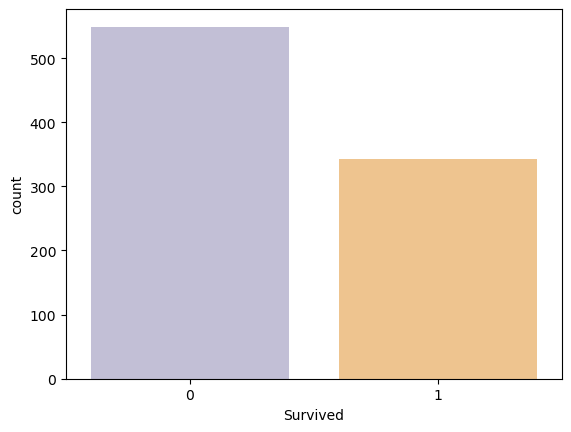

In [51]:
#Looking at how many survived the disaster 
sns.countplot(x='Survived', data=titanic_df, palette = 'PuOr_r')

In the 'Survived' column 0 represents not surviving and 1 surviving. More people died during the distater than survived it.  

<Axes: xlabel='Pclass', ylabel='Count'>

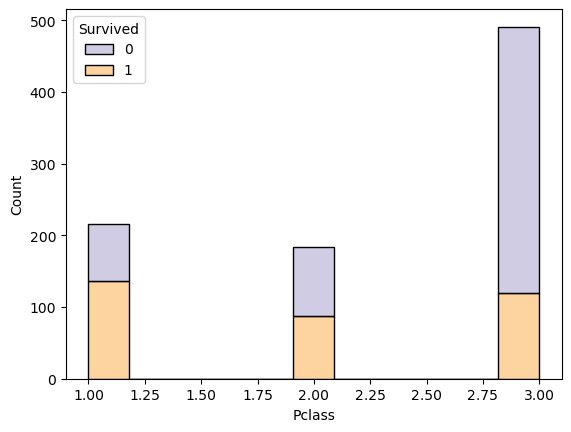

In [52]:
#Looking at how each category relates to survival on its own 
# Pclass vs Survived 

sns.histplot(data=titanic_df, x='Pclass', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

<Axes: xlabel='Pclass', ylabel='Age'>

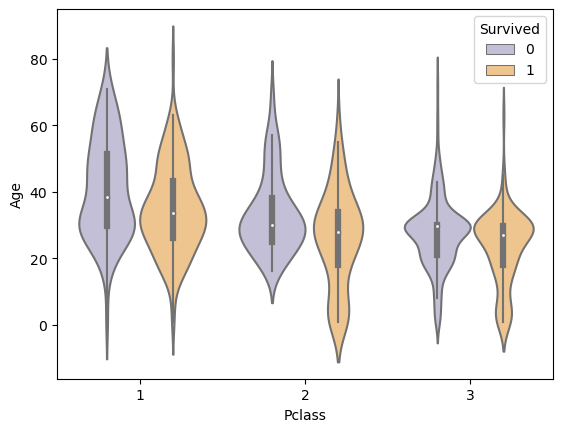

In [58]:
sns.violinplot(data = titanic_df, x = 'Pclass', y = 'Age', hue = 'Survived', palette = 'PuOr_r')

The majority of passengers on the Titanic were 3rd class. Most did not survive the sinking of the ship. In 2nd class roughly half survived. In 1st class more than half survived the distater. Being a 3rd class passenger drastically lowered you chances of survival. 

<Axes: xlabel='Sex', ylabel='Count'>

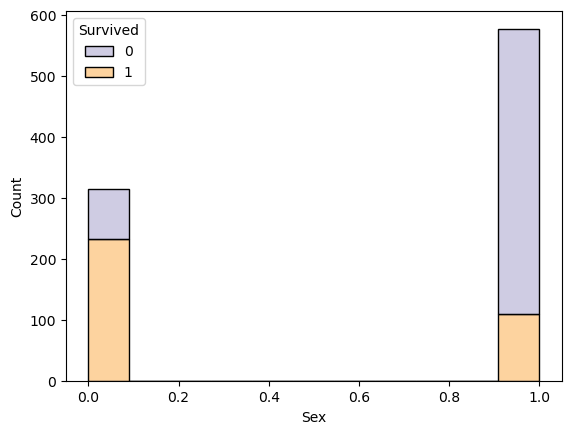

In [53]:
# Sex vs Survived 
sns.histplot(data=titanic_df, x='Sex', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

In the column 'Sex' 0 represent female passengers and 1 male passengers. Even though there were only about half as many female passenger as there were male passengers, they had roughly double the chance at surviving the sinking. 

<Axes: xlabel='Age', ylabel='Count'>

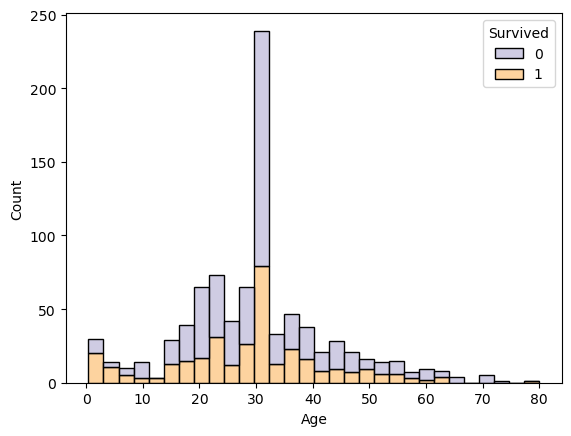

In [54]:
# Age vs Survived 
sns.histplot(data=titanic_df, x='Age', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

<Axes: xlabel='Survived', ylabel='Age'>

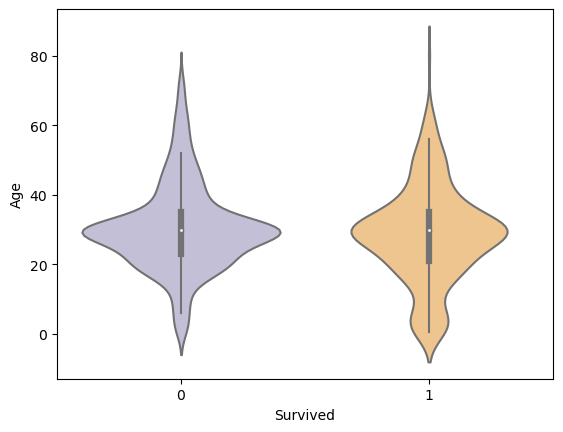

In [56]:
sns.violinplot(data = titanic_df, x = 'Survived', y = 'Age', palette = 'PuOr_r')

At most ages, the chances at survival seem to be somewhat less than 50%. Two stand outs are the survival chances of anyone below 10 years of age and around 30 years of age. More children survived than died. On the other side, if you were around 30 years of age you had a much higher chance of dying. However, one thing to consider here is that the Age column had a lot of missing entries and these were filled in using the mean value of the column, which might have affected the outcome of this graph.  

<Axes: xlabel='SibSp', ylabel='Count'>

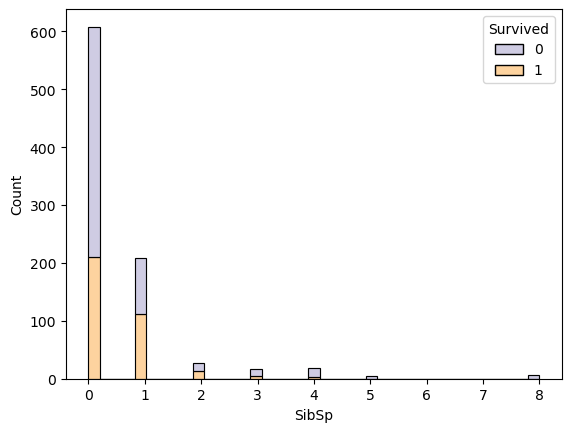

In [59]:
# SibSp vs Survived 
sns.histplot(data=titanic_df, x='SibSp', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

Most people that died did not have a spouse or siblings on board. Neither did most people that survived. Having one spouse or sibling meant you were roughly half as likely to survive as not. Only a small number had two or more. Having three or more meant you were more likely to die. This could potentially be because they would try to stay together as a family making it harder to get to the lifeboats. 

<Axes: xlabel='Parch', ylabel='Count'>

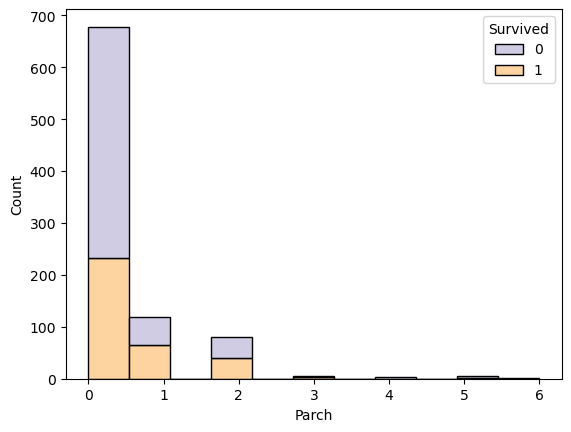

In [60]:
# Parch vs Survived 
sns.histplot(data=titanic_df, x='Parch', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

Same as with the graph for SibSp vs Survival, the majority of people that died and survived did not have a parent or child with them on board. Having one or two on board brought the chance of survival to roughly half. Only a very small number had more than two. 

<Axes: xlabel='Fare', ylabel='Count'>

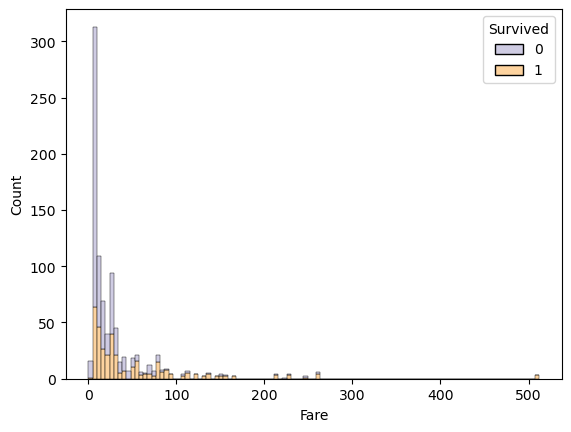

In [61]:
# Fare vs Survived 
sns.histplot(data=titanic_df, x='Fare', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

Most people that died had paid a lower fare. People that paid a higher fare were more likely to survive. 

<Axes: xlabel='Embarked', ylabel='Count'>

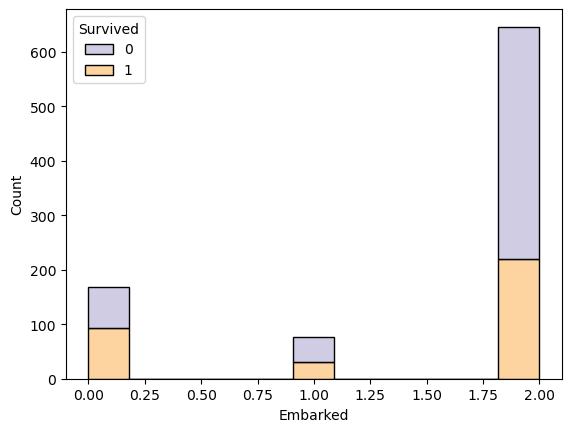

In [62]:
# Embarked vs Survived 
sns.histplot(data=titanic_df, x='Embarked', hue = 'Survived', palette = 'PuOr_r', multiple='stack')

The majority of passengers embarked in Southampton. Most people that survived and did not survive embarked in Southampton. Comparing these to Cherbourg and Queenstown, it shows that passengers embarking in Cherbourg had a roughly equal chance of survival, but it was less than half if a passenger embarked in Queenstown. 

<Axes: >

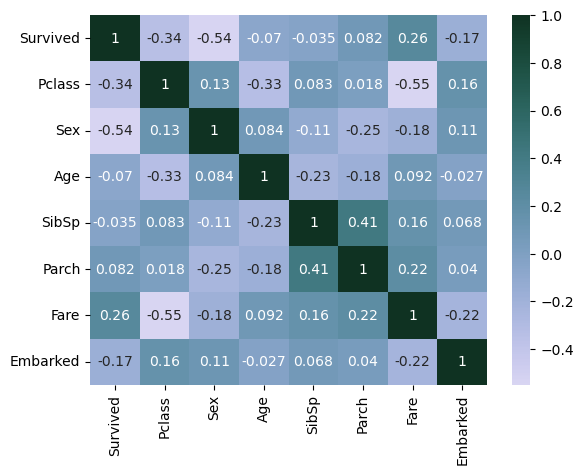

In [63]:
#Heatmap of data 
sns.heatmap(titanic_df.corr(), annot=True, cmap=sns.cubehelix_palette(start=2,as_cmap=True))

From the heatmap it can be seen that the strongest indicator to surviving the disaster was Fare with a correlation of 0.26. Surprisingly, Sex and Passenger Class have a negative correlation despite both seeming to show that a female passenger or 1st class passenger was more likely to survive than a male or 3rd class passenger. 

<Axes: xlabel='Sex', ylabel='Fare'>

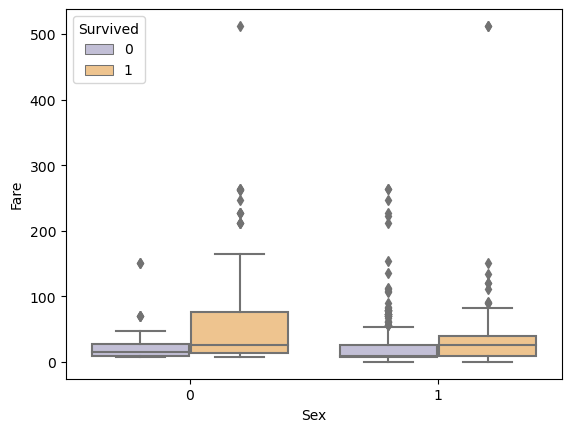

In [65]:
sns.boxplot(data=titanic_df, x = 'Sex', y = 'Fare', hue = 'Survived', palette = 'PuOr_r')

This graph shows the impact fare had on the survival for both sexes. The heatmap surprisingly did not show a strong correlation for Age or Sex. This graph could somewhat show why this might be. For both sexes a low fare more likely meant dying in the disaster. However, more male passengers that paid a higher fare survived. This effect is even more defined in female passengers. The 75% percentile of not suviving female passengers is roughly equal with the 50% percentile of female suvivors, showing that more women who paid a higher fare were more likely to survive. 

<Axes: xlabel='Pclass', ylabel='Fare'>

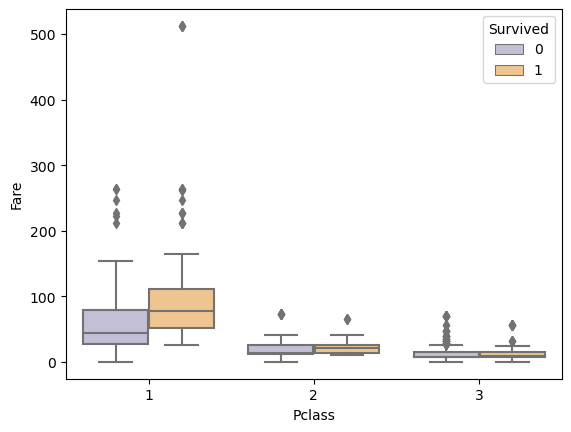

In [66]:
sns.boxplot(data=titanic_df, x = 'Pclass', y = 'Fare', hue = 'Survived', palette = 'PuOr_r')

This graph comparing the class to fare is another indicator that fare had a big impact. There is not much variation in 2nd and 3rd class, but more 1st class passengers that paid a higher fare survived than 1st class passengers that paid a lower fare. 

#### In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data? 

Upperclass passengers would have stayed in 1st class and paid a higher fare. Comparing these to survival gives the following graphs:  

<Axes: xlabel='Pclass', ylabel='Count'>

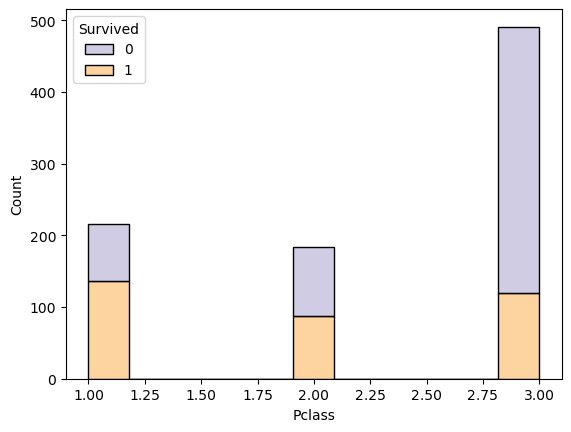

In [67]:
sns.histplot(data=titanic_df, x = 'Pclass', hue = 'Survived', multiple = 'stack', palette = 'PuOr_r')

Passengers from every class died, but staying in 3rd class severly lowered your chances of survival, while staying in 1st class raised your chances of survival. In 2nd class these were roughly equal. As passengers on lifeboats would most likely have survived the icy waters, it seems likely that 1st class passengers were given preferential treatment compared to the other two classes. 

<Axes: xlabel='Survived', ylabel='Fare'>

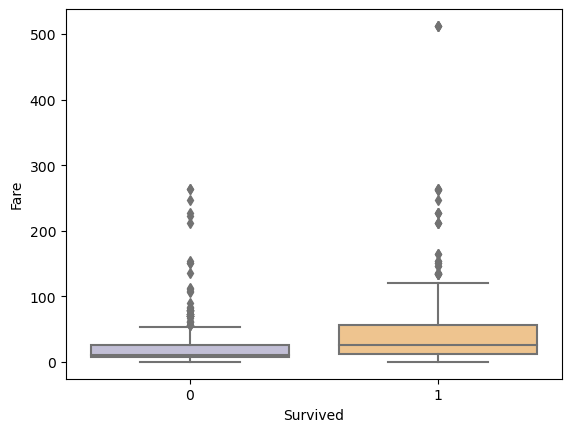

In [68]:
sns.boxplot(data=titanic_df, x = 'Survived', y='Fare', palette = 'PuOr_r') 

In this graph the fare is compared to survival. The 50% quartile of 1 is on the same level as the 75% quartile of 0. The maximum of 0 is about the same as the 75% quartile of 1. That shows that more passengers that survived had also bought a more expensive ticket. This is a further indicator that upper-class passengers were given preferential treatment. 

#### “Women and children first”. Was this the case? 

To answer the question the previous graphs on Survival compared to Age, Sex and Parch should be considered. Additionally to the following graph:  

<Axes: xlabel='Sex', ylabel='Age'>

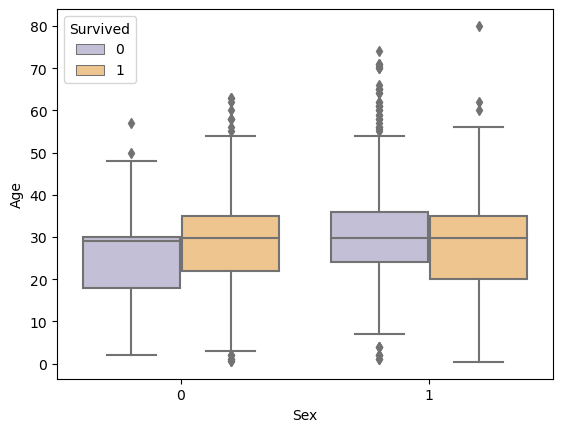

In [69]:
sns.boxplot(data=titanic_df, x = 'Sex', y = 'Age', hue = 'Survived', palette = 'PuOr_r') 

As the minimum value for surviving male passengers is lower than for male passenger that died (not taking into account outliers), it seems to indicate that age played a role in a male passenger's chances of survival and that boys were more likely to be saved compared to older male passengers. Interestingly, the 25% and 75% quartiles of female passengers that died is lower than for surviving female passengers. This suggests that older female passengers were more likely to be saved than a female passenger in her early 20s. 

As shown in the previous graph of 'Sex vs. Survived' more female passengers survived than male passengers. Additionally, in the 'Age vs. Survived' graph passengers below the age of 10 were more likely to survive than passengers of any other age group. Another indicator is the 'Parch vs Survived' graph. Having one child or parent raised the chances of survival, possibly because mothers with children were prioritised. Altogether, this does seem to indicate that a policy of 'Women and children first' was in place/followed. 

#### Add one other observation that you have noted in the dataset. 

<Axes: xlabel='Pclass', ylabel='Age'>

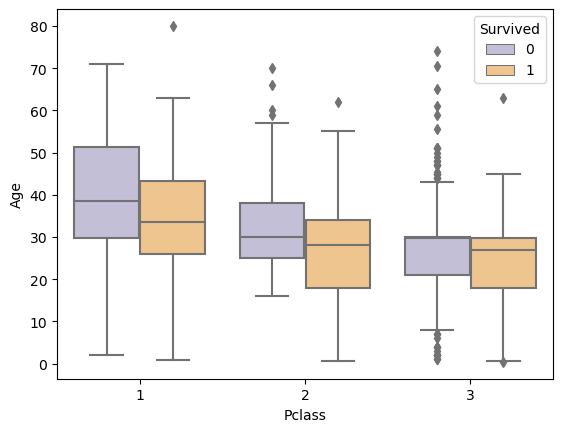

In [70]:
sns.boxplot(data=titanic_df, x = 'Pclass', y = 'Age', hue = 'Survived', palette = 'PuOr_r')

Finally, this graph shows the age distribution in each passenger class. The majority of passengers in 1st class (surviving and not) were older than in 2nd or 3rd class. As you age you are more likely to earn more and so older people could afford the higher fare for 1st class. 

Children were passengers in all classes, however it is interesting to note that the minimum age for anyone who died in 2nd class is just below 20. This shows that all 2nd class children survived, whereas they are among the dead in all other classes (albeit anyone under 10 years old as outlier in 3rd class). 

It also shows that the passengers that died in 1st and 2nd class were generally older than those that survived and that the 25% quartile of survivors in 3rd class is younger than those that died. This suggests that older passengers helped younger passengers survive. 